In [1]:
filename = "./bank-full.csv"
target_variable_name = 'y'

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

22/01/21 12:12:28 WARN Utils: Your hostname, Rose resolves to a loopback address: 127.0.1.1; using 192.168.1.14 instead (on interface enp3s0)
22/01/21 12:12:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/01/21 12:12:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = spark.read.csv(filename, header=True, inferSchema=True, sep=';')
df.show(10)

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

In [4]:
df.count()

45211

In [5]:
df.describe().toPandas()

,summary,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
1,mean,40.93621021432837,None,None,None,None,1362.2720576850766,None,None,None,15.80641879188693,None,258.1630797814691,2.763840658246887,40.19782796222158,0.5803233726305546,None,None
2,stddev,10.618762040975401,None,None,None,None,3044.7658291685243,None,None,None,8.322476153044589,None,257.5278122651712,3.0980208832791813,100.12874599059818,2.3034410449312164,None,None
3,min,18,admin.,divorced,primary,no,-8019,no,no,cellular,1,apr,0,1,-1,0,failure,no
4,max,95,unknown,single,unknown,yes,102127,yes,yes,unknown,31,sep,4918,63,871,275,unknown,yes


In [6]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('y', 'string')]

In [7]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [8]:
df.groupBy('education').count().show()

+---------+-----+
|education|count|
+---------+-----+
|  unknown| 1857|
| tertiary|13301|
|secondary|23202|
|  primary| 6851|
+---------+-----+



In [9]:
df.groupBy(target_variable_name).count().show()

+---+-----+
|  y|count|
+---+-----+
| no|39922|
|yes| 5289|
+---+-----+



In [10]:
df.groupBy(['education', target_variable_name]).count().show()

+---------+---+-----+
|education|  y|count|
+---------+---+-----+
|  unknown| no| 1605|
| tertiary| no|11305|
|secondary| no|20752|
|  unknown|yes|  252|
|  primary| no| 6260|
|  primary|yes|  591|
|secondary|yes| 2450|
| tertiary|yes| 1996|
+---------+---+-----+



In [11]:
from pyspark.sql.functions import *

In [12]:
df.groupBy(target_variable_name).agg({'balance': 'avg', 'age': 'avg'}).show()

+---+------------------+------------------+
|  y|      avg(balance)|          avg(age)|
+---+------------------+------------------+
| no|1303.7149691899203| 40.83898602274435|
|yes|1804.2679145396105|41.670069956513515|
+---+------------------+------------------+



In [13]:
df.summary().toPandas()

,summary,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
1,mean,40.93621021432837,None,None,None,None,1362.2720576850766,None,None,None,15.80641879188693,None,258.1630797814691,2.763840658246887,40.19782796222158,0.5803233726305546,None,None
2,stddev,10.618762040975401,None,None,None,None,3044.7658291685243,None,None,None,8.322476153044589,None,257.5278122651712,3.0980208832791813,100.12874599059818,2.3034410449312164,None,None
3,min,18,admin.,divorced,primary,no,-8019,no,no,cellular,1,apr,0,1,-1,0,failure,no
4,25%,33,None,None,None,None,72,None,None,None,8,None,103,1,-1,0,None,None
5,50%,39,None,None,None,None,448,None,None,None,16,None,180,2,-1,0,None,None
6,75%,48,None,None,None,None,1427,None,None,None,21,None,319,3,-1,0,None,None
7,max,95,unknown,single,unknown,yes,102127,yes,yes,unknown,31,sep,4918,63,871,275,unknown,yes


In [14]:
def cardinality_calculation(df, cut_off=1):
    cardinality = df.select(*[approxCountDistinct(c).alias(c) for c in df.columns])
    
    final_cardinality_df = cardinality.toPandas().transpose()
    final_cardinality_df.reset_index(inplace=True)
    final_cardinality_df.rename(columns={0: 'Cardinality'}, inplace=True)
    
    vars_selected = final_cardinality_df['index'][final_cardinality_df['Cardinality'] <= cut_off]
    
    return final_cardinality_df, vars_selected

In [15]:
cardinality_df, cardinality_vars_selected = cardinality_calculation(df)

22/01/21 12:12:51 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [16]:
cardinality_df

,index,Cardinality
0,age,76
1,job,11
2,marital,3
3,education,4
4,default,2
5,balance,7375
6,housing,2
7,loan,2
8,contact,3
9,day,32


In [17]:
cardinality_vars_selected

Series([], Name: index, dtype: object)

# Missing values check

In [18]:
def missing_calculation(df, miss_percentage=0.8):
    missing = df.select(*[count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
    length_df = df.count()
    
    final_missing_df = missing.toPandas().transpose()
    final_missing_df.reset_index(inplace=True)
    final_missing_df.rename(columns={0: 'missing_count'}, inplace=True)
    final_missing_df['missing_percentage'] = final_missing_df['missing_count'] / length_df
    
    vars_selected = final_missing_df['index'][final_missing_df['missing_percentage'] >= miss_percentage]
    
    return final_missing_df, vars_selected

In [19]:
missing_df, missing_vars_selected = missing_calculation(df)

In [20]:
missing_df

,index,missing_count,missing_percentage
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,balance,0,0.0
6,housing,0,0.0
7,loan,0,0.0
8,contact,0,0.0
9,day,0,0.0


In [21]:
missing_vars_selected

Series([], Name: index, dtype: object)

# Identify variable types

In [22]:
def variable_type(df):
    vars_list = df.dtypes
    char_vars = []
    num_vars = []
    for i in vars_list:
        if i[1] in ('string'):
            char_vars.append(i[0])
        else:
            num_vars.append(i[0])
            
    return char_vars, num_vars

In [23]:
char_vars, num_vars = variable_type(df)

In [24]:
char_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [25]:
num_vars

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [26]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

In [27]:
def category_to_index(df, char_vars):
    char_df = df.select(char_vars)
    indexers = [StringIndexer(inputCol=c, 
                              outputCol=c+'_index', 
                              handleInvalid='keep') for c in char_df.columns]
    
    pipeline = Pipeline(stages=indexers)
    char_labels = pipeline.fit(char_df)
    df = char_labels.transform(df)
    
    return df, char_labels

In [28]:
df, char_labels = category_to_index(df, char_vars)

In [29]:
df.show(2)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+-------------+---------------+-------------+-------------+----------+-------------+-----------+--------------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|job_index|marital_index|education_index|default_index|housing_index|loan_index|contact_index|month_index|poutcome_index|y_index|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+-------------+---------------+-------------+-------------+----------+-------------+-----------+--------------+-------+
| 58|management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|      1.0|          0.0|            1.0|          0.0|          0.0|       0.0|          1.0|        0.0|

In [30]:
char_labels

PipelineModel_62a6059583c4

In [31]:
df = df.select([c for c in df.columns if c not in char_vars])

In [32]:
def rename_columns(df, char_vars):
    mapping = dict(zip([i + "_index" for i in char_vars], char_vars))
    df = df.select([col(c).alias(mapping.get(c, c)) for c in df.columns])
    return df

In [33]:
df = rename_columns(df, char_vars)
df

DataFrame[age: int, balance: int, day: int, duration: int, campaign: int, pdays: int, previous: int, job: double, marital: double, education: double, default: double, housing: double, loan: double, contact: double, month: double, poutcome: double, y: double]

In [34]:
df.show()

+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+---+
|age|balance|day|duration|campaign|pdays|previous| job|marital|education|default|housing|loan|contact|month|poutcome|  y|
+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+---+
| 58|   2143|  5|     261|       1|   -1|       0| 1.0|    0.0|      1.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|0.0|
| 44|     29|  5|     151|       1|   -1|       0| 2.0|    1.0|      0.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|0.0|
| 33|      2|  5|      76|       1|   -1|       0| 7.0|    0.0|      0.0|    0.0|    0.0| 1.0|    1.0|  0.0|     0.0|0.0|
| 47|   1506|  5|      92|       1|   -1|       0| 0.0|    0.0|      3.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|0.0|
| 33|      1|  5|     198|       1|   -1|       0|11.0|    1.0|      3.0|    0.0|    1.0| 0.0|    1.0|  0.0|     0.0|0.0|
| 35|    231|  5|     13

# Assemble Features

In [35]:
from pyspark.ml.feature import VectorAssembler

In [36]:
def assemble_vectors(df, features_list, target_variable_name):
    stages = []
    assembler = VectorAssembler(inputCols=features_list, outputCol='features')
    stages = [assembler]
    
    selectedCols = [target_variable_name, 'features'] + features_list
    pipeline = Pipeline(stages=stages)
    assembleModel = pipeline.fit(df)
    df = assembleModel.transform(df).select(selectedCols)
    
    return df

In [37]:
features_list = df.columns
features_list.remove(target_variable_name)

df = assemble_vectors(df, features_list, target_variable_name)

In [38]:
df.show(2)

+---+--------------------+---+-------+---+--------+--------+-----+--------+---+-------+---------+-------+-------+----+-------+-----+--------+
|  y|            features|age|balance|day|duration|campaign|pdays|previous|job|marital|education|default|housing|loan|contact|month|poutcome|
+---+--------------------+---+-------+---+--------+--------+-----+--------+---+-------+---------+-------+-------+----+-------+-----+--------+
|0.0|(16,[0,1,2,3,4,5,...| 58|   2143|  5|     261|       1|   -1|       0|1.0|    0.0|      1.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
|0.0|(16,[0,1,2,3,4,5,...| 44|     29|  5|     151|       1|   -1|       0|2.0|    1.0|      0.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
+---+--------------------+---+-------+---+--------+--------+-----+--------+---+-------+---------+-------+-------+----+-------+-----+--------+
only showing top 2 rows



In [39]:
df.schema['features'].metadata['ml_attr']['attrs']

{'numeric': [{'idx': 0, 'name': 'age'},
  {'idx': 1, 'name': 'balance'},
  {'idx': 2, 'name': 'day'},
  {'idx': 3, 'name': 'duration'},
  {'idx': 4, 'name': 'campaign'},
  {'idx': 5, 'name': 'pdays'},
  {'idx': 6, 'name': 'previous'}],
 'nominal': [{'vals': ['blue-collar',
    'management',
    'technician',
    'admin.',
    'services',
    'retired',
    'self-employed',
    'entrepreneur',
    'unemployed',
    'housemaid',
    'student',
    'unknown',
    '__unknown'],
   'idx': 7,
   'name': 'job'},
  {'vals': ['married', 'single', 'divorced', '__unknown'],
   'idx': 8,
   'name': 'marital'},
  {'vals': ['secondary', 'tertiary', 'primary', 'unknown', '__unknown'],
   'idx': 9,
   'name': 'education'},
  {'vals': ['no', 'yes', '__unknown'], 'idx': 10, 'name': 'default'},
  {'vals': ['yes', 'no', '__unknown'], 'idx': 11, 'name': 'housing'},
  {'vals': ['no', 'yes', '__unknown'], 'idx': 12, 'name': 'loan'},
  {'vals': ['cellular', 'unknown', 'telephone', '__unknown'],
   'idx': 13,


In [40]:
import pandas as pd

In [41]:
for k, v in df.schema['features'].metadata['ml_attr']['attrs'].items():
    features_df = pd.DataFrame(v)

In [42]:
features_df

,vals,idx,name
0,"[blue-collar, management, technician, admin., ...",7,job
1,"[married, single, divorced, __unknown]",8,marital
2,"[secondary, tertiary, primary, unknown, __unkn...",9,education
3,"[no, yes, __unknown]",10,default
4,"[yes, no, __unknown]",11,housing
5,"[no, yes, __unknown]",12,loan
6,"[cellular, unknown, telephone, __unknown]",13,contact
7,"[may, jul, aug, jun, nov, apr, feb, jan, oct, ...",14,month
8,"[unknown, failure, other, success, __unknown]",15,poutcome


In [43]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

In [44]:
no_of_components = 3
pca = PCA(k=no_of_components, inputCol='features', outputCol='pcaFeatures')
model = pca.fit(df)
result = model.transform(df).select('pcaFeatures')
result.show(truncate=False)

22/01/21 12:13:09 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/01/21 12:13:09 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


+------------------------------------------------------------+
|pcaFeatures                                                 |
+------------------------------------------------------------+
|[-2143.4953647735806,-257.0420740676509,1.2449712753045807] |
|[-29.29226175164622,-150.92888640669173,1.0493026899277984] |
|[-2.150889773941845,-75.98191250436618,1.076065195538016]   |
|[-1506.1823305908113,-89.21547154672724,1.2683999536975388] |
|[-1.3750908349447704,-197.98356175494834,0.9892427009814176]|
|[-231.26679712386607,-138.56034919503722,1.0576960891394662]|
|[-447.4072782675638,-216.16541383839757,1.0066666548029033] |
|[-2.7123264447441384,-379.9785828164356,0.875150469836411]  |
|[-121.11144848214039,-49.756360259707854,1.1725853591922941]|
|[-593.1146061641073,-53.89364261832045,1.1817022732261329]  |
|[-270.4212341323415,-221.4869966182793,1.0170824073203284]  |
|[-390.2608167665407,-136.27016909339142,1.0625336862698371] |
|[-6.967616100129074,-516.9674558248698,0.8003545768065

22/01/21 12:13:09 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
22/01/21 12:13:09 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [45]:
model.pc.toArray()

array([[-3.41021399e-04,  2.79524640e-04,  2.58353293e-03],
       [-9.99998245e-01,  1.83654726e-03,  1.13892524e-04],
       [-1.22934480e-05,  9.79995613e-04,  7.79347982e-03],
       [-1.83671689e-03, -9.99996986e-01, -7.36955549e-04],
       [ 1.48468991e-05,  1.01391994e-03,  2.75121381e-03],
       [-1.13085547e-04,  7.49207153e-04, -9.99889046e-01],
       [-1.26153895e-05, -6.36100089e-06, -1.04654388e-02],
       [-1.78789640e-05, -4.11817349e-05,  5.51411389e-04],
       [ 6.41085932e-06, -5.23364803e-05, -1.45349520e-04],
       [-1.11185424e-05,  1.30366514e-05,  2.01500982e-04],
       [ 2.91665702e-06,  4.42643869e-06,  3.95562163e-05],
       [-1.12221341e-05,  1.26153926e-05,  6.17569266e-04],
       [ 1.01623400e-05,  1.50687571e-05,  8.23933054e-05],
       [-5.68377754e-07,  6.95393403e-05,  1.03951369e-03],
       [-7.60886236e-05, -1.16754927e-04, -3.24662847e-03],
       [-8.55162111e-06, -6.01853226e-05, -4.94522998e-03]])

In [46]:
model.explainedVariance

DenseVector([0.9918, 0.0071, 0.0011])

In [47]:
import matplotlib.pyplot as plt
import numpy as np

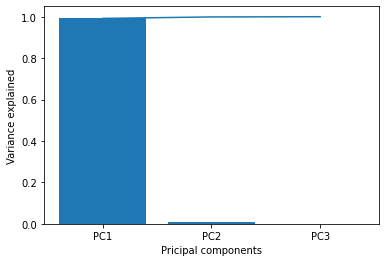

In [48]:
x = []
for i in range(0, len(model.explainedVariance)):
    x.append('PC' + str(i+1))

y = np.array(model.explainedVariance)
z = np.cumsum(model.explainedVariance)
plt.xlabel('Pricipal components')
plt.ylabel('Variance explained')
plt.bar(x, y)
plt.plot(x, z)

In [49]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

In [50]:
def scaled_assemble_vectors(df, features_list, target_variable_name):
    stages = []
    
    assembler = VectorAssembler(inputCols=features_list, outputCol='assembled_features')
    scaler = StandardScaler(inputCol=assembler.getOutputCol(), outputCol='features2')
    stages = [assembler, scaler]
    
    selectedCols = [target_variable_name, 'features2'] + features_list
    pipeline = Pipeline(stages=stages)
    scaleAssembleModel = pipeline.fit(df)
    df = scaleAssembleModel.transform(df).select(selectedCols)
    
    return df

In [51]:
features_list = df.columns
features_list.remove(target_variable_name)
df = scaled_assemble_vectors(df, features_list, target_variable_name)

pca = PCA(k=3, inputCol='features2', outputCol='pcaFeatures')
model = pca.fit(df)

result = model.transform(df).select('pcaFeatures')
result.show(truncate=False)

+------------------------------------------------------------+
|pcaFeatures                                                 |
+------------------------------------------------------------+
|[-0.656780883522954,4.312194871151715,-4.393764846983172]   |
|[-0.5905533920181225,2.7430023739084834,-2.0129736282039534]|
|[-0.7923309293106096,2.4285178222008144,-1.4128758397236354]|
|[-0.7779852947452655,4.298302632063681,-5.322505502931134]  |
|[-0.5280039534403727,6.559141503668741,-1.4081500208402007] |
|[-0.7028277580738278,2.709340734232335,-3.2263556470672334] |
|[-0.8104872327792485,1.429021001342883,-1.619935441335167]  |
|[-0.9758735335487514,2.862044859013722,0.4335559756407308]  |
|[-0.7126916038564428,5.1756377163943945,-4.531453571471411] |
|[-0.5939132026125427,2.746785250427306,-2.0709944257211284] |
|[-0.48367202786592667,2.584502296303892,-0.8133472106611472]|
|[-0.5574665926507092,2.079820030405431,-1.169526629998768]  |
|[-0.6052039081601734,3.4943812853157916,-3.06065582479

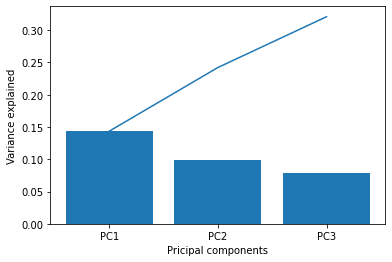

In [52]:
x = []
for i in range(0, len(model.explainedVariance)):
    x.append('PC' + str(i+1))

y = np.array(model.explainedVariance)
z = np.cumsum(model.explainedVariance)
plt.xlabel('Pricipal components')
plt.ylabel('Variance explained')
plt.bar(x, y)
plt.plot(x, z)

In [53]:
model.explainedVariance

DenseVector([0.1434, 0.0987, 0.0787])

# SVD

In [54]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

In [55]:
df_svd_vector = df.rdd.map(lambda x: x['features'].toArray())
mat = RowMatrix(df_svd_vector)

svd = mat.computeSVD(5, computeU=True)
U = svd.U
s = svd.s
V = svd.V

In [56]:
features_list = char_vars

In [57]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

In [58]:
selector = ChiSqSelector(numTopFeatures=6, featuresCol="features", 
                         outputCol="selectedFeatures", labelCol="y")

In [59]:
chi_selector = selector.fit(df)
result = chi_selector.transform(df)
print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
print("Selected Indices: ", chi_selector.selectedFeatures)

features_df['chisq_importance'] = features_df['idx']\
    .apply(lambda x: 1 if x in chi_selector.selectedFeatures else 0)
print(features_df)

ChiSqSelector output with top 6 features selected
Selected Indices:  [0, 1, 2, 3, 4, 5]
                                                vals  idx       name  \
0  [blue-collar, management, technician, admin., ...    7        job   
1             [married, single, divorced, __unknown]    8    marital   
2  [secondary, tertiary, primary, unknown, __unkn...    9  education   
3                               [no, yes, __unknown]   10    default   
4                               [yes, no, __unknown]   11    housing   
5                               [no, yes, __unknown]   12       loan   
6          [cellular, unknown, telephone, __unknown]   13    contact   
7  [may, jul, aug, jun, nov, apr, feb, jan, oct, ...   14      month   
8      [unknown, failure, other, success, __unknown]   15   poutcome   

   chisq_importance  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7              

In [60]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features', labelCol=target_variable_name)
rf_model = rf.fit(df)
rf_model.featureImportances

SparseVector(16, {0: 0.0173, 1: 0.0017, 2: 0.0053, 3: 0.4175, 4: 0.0025, 5: 0.0442, 6: 0.0418, 7: 0.0133, 8: 0.0033, 9: 0.0014, 11: 0.0196, 12: 0.001, 13: 0.0208, 14: 0.1764, 15: 0.2338})

In [61]:
import pandas as pd
for k, v in df.schema["features"].metadata["ml_attr"]["attrs"].items():
    features_df = pd.DataFrame(v)
    rf_output = rf_model.featureImportances
    features_df['Importance'] = features_df['idx']\
        .apply(lambda x: rf_output[x] if x in rf_output.indices else 0)
    #sort values based on descending importance feature
    features_df.sort_values("Importance", ascending=False, inplace=True)

In [62]:
features_df

,vals,idx,name,Importance
8,"[unknown, failure, other, success, __unknown]",15,poutcome,0.233825
7,"[may, jul, aug, jun, nov, apr, feb, jan, oct, ...",14,month,0.176417
6,"[cellular, unknown, telephone, __unknown]",13,contact,0.020764
4,"[yes, no, __unknown]",11,housing,0.019575
0,"[blue-collar, management, technician, admin., ...",7,job,0.013350
1,"[married, single, divorced, __unknown]",8,marital,0.003297
2,"[secondary, tertiary, primary, unknown, __unkn...",9,education,0.001435
5,"[no, yes, __unknown]",12,loan,0.000990
3,"[no, yes, __unknown]",10,default,0.000000
